In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes',titlesize='xx-large')
plt.rc('axes',labelsize='x-large')
plt.rc('legend',fontsize='x-large')
plt.rc('ti')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)
np.set_printoptions(suppress=True, precision=2)

from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

import pickle

with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)
    
with open('../data/loss_grid', 'rb') as f:
    loss_grid =pickle.load(f)

Using TensorFlow backend.


# An introduction to neural networks with Keras
Dr. Florent Martin (Universität Regensburg)  
March 2018

**Machine Learning**
* choose a **MODEL** which depends on **PARAMETERS**
*  learn from **DATA**
* choose model parameters that **FIT** the data

**Neural Networks**  =  family of models

**Keras** = Python Library for Neural Networks

<img style="height:600px;margin: -5px 0px 0px 100px" src="../reports/figures/table1.png">

1. Logistic Regression
  1. Iris Dataset
  3. Logistic Regression with scikit-learn
  4. Logistic Regression with Keras
1. Gradient descent 
  1. Optimization
  2. Loss function
1. Neural Networks
  1. Versicolor
  2. Logistic Regression again
  3. Neural Networks with hidden layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Part 1  
# Before Neural Networks: Logistic Regression

# 1.1. Iris dataset

In [3]:
iris  = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

<center><font size=7>Setosa</font></center> | <center><font size=7>**Versicolor**</font></center> | <center><font size=7> **Virginica** </font></center>
---|---|---
![setosa](../reports/setosa.jpg) | ![setosa](../reports/versicolor.jpg) | ![setosa](../reports/virginica.jpg)

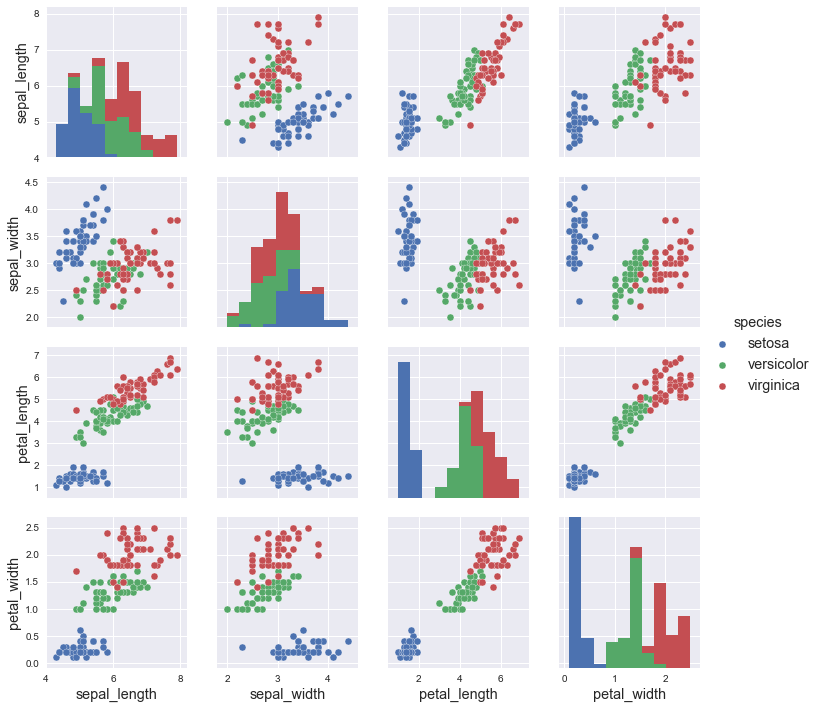

In [7]:
sns.pairplot(iris, hue="species");

### Goal: knowing the petal width, predict if the iris is a virginica  

**Input** = petal width

**Question**: Is the iris sample a virginica?

**Output** =  False / True (equivalently 0 / 1)

In [8]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
92,5.8,2.6,4.0,1.2,versicolor,0
141,6.9,3.1,5.1,2.3,virginica,1
130,7.4,2.8,6.1,1.9,virginica,1
119,6.0,2.2,5.0,1.5,virginica,1
48,5.3,3.7,1.5,0.2,setosa,0


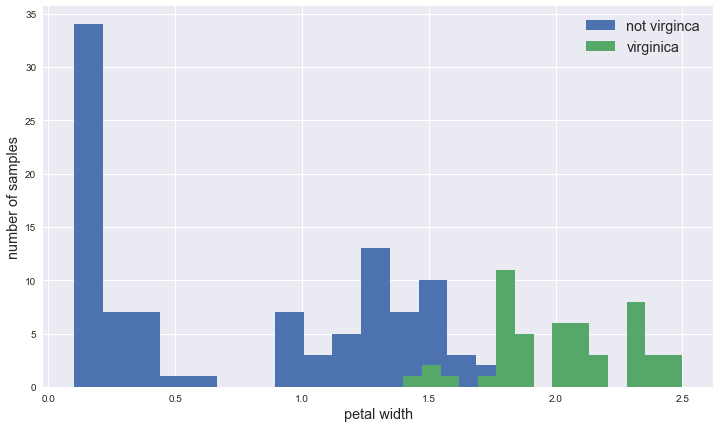

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
iris.groupby('isVirginica').hist(column='petal_width', ax = ax, bins=15)
plt.legend(['not virginca', 'virginica'])
plt.xlabel('petal width')
plt.ylabel('number of samples')
plt.title('');

# Is the plant a virginica?
![guess the probabilities](../reports/probas1.png)

# Is the plant a virginica?
![guess the probabilities](../reports/probas2.png)

# Is the plant a virginica?
![guess the probabilities](../reports/probas3.png)

# Logistic Regression

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVirginica').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not virginca', 'virginica']);

<font size=6>
**Logistic Regression** returns a function 
<br><br>
$$ P: [0,3] \to [0,1]$$
</font>
* $x = $ petal width 
* $P(x) =$ estimate of the probability that the plant is a virginica.
<br><br>
$$0\leq P(x) \leq 1$$

# Sigmoid function
<br><br>
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
plt.rc('xtick',labelsize='xx-large')
plt.rc('ytick',labelsize='xx-large')

In [ ]:
#plt.rcParams
plt.rc('figure',figsize=(14,7))

In [ ]:
x = np.arange(-5, 5, .01)
plt.figure(figsize=(10,7))
plt.plot(x, sigmoid(x),'r--',label='sigmoid');

In [ ]:
plt.rc('figure',figsize=(14,7))
fig, ax = plt.subplots()
#x = np.arange(0,3,.01)
iris.groupby('isVirginica').hist(column='petal_width', \
                                 normed=True, ax=ax, alpha=.8);
plt.legend(['not virginca', 'virginica'])
#W=3; B=-5
plt.plot(x, sigmoid(W*x+B),'r--',linewidth=4);

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax , alpha=.8)
plt.legend(['not virginca', 'virginica'])
plt.plot(x, sigmoid(x),'r--', linewidth=4);

<font size=6>
**Logistic Regression** is a model depending on parameters $W$ and $B$.  
    <br>
For an **input x** it  ouputs the probability
<br><br>
$$P_{W,B}(x) = \sigma(Wx+B)$$
where     
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$
is the **sigmoid function **.   
    <br>
We call $W$ the **weight** and $B$  the **bias**.
</font>

## 1.2 Logistic Regression with Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(iris[['petal_width']], iris['isVirginica'])

In [ ]:
w , b = model.coef_ , model.intercept_
print(w,b)

In [ ]:
plt.rc('figure',figsize=(12,6))

In [ ]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.figure(figsize=(10,7))
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')
plt.ylabel('predicted probability');

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax, alpha=.8)
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--');

### How to evaluate the model?  

<font size=6>
$$ \textbf{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{total number of samples}}$$
<size>

In [ ]:
model.score( iris[['petal_width']] , iris['isVirginica'] )

# 1.3 Logistic Regression with Keras

In [ ]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

# Graphical representation of Logistic Regression

Choose the parameters:

* W (the weight)
* B (the bias)

![logistic regression](../reports/figures/01-log.png)

![logistic regression](../reports/figures/01-log.png)

In [ ]:
model = Sequential([
    Dense(1, input_dim=1), # for the map x -> W*x + B
    Activation('sigmoid') # for the sigmoid function
])

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [ ]:
model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=500, verbose=False)
model.get_weights()

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax)
plt.legend(['not virginica', 'virginica'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--');

# Part 2
# Gradient descent

## How does Logistic Regression work? 

# 2.1 Optimization, gradient descent with Keras

In [ ]:
model = Sequential([
    Dense(1,input_dim=1, kernel_regularizer=regularizers.l2(.1)) ,
    Activation('sigmoid') , 
]) 

In [ ]:
model.compile( optimizer='sgd' , loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit( iris[['petal_width']] , iris['isVirginica'] , epochs=500)

In [ ]:
x_grid, y_grid = np.mgrid[ -10:10:.1 , -10:10:.1 ]

In [ ]:
def get_accuracy(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy= model.evaluate(iris[['petal_width']] , iris[['isVirginica']] , verbose=0)[1]
    return accuracy
vaccuracy = np.vectorize(get_accuracy)

In [ ]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

In [ ]:
acc_grid = vaccuracy(x_grid,y_grid)  

In [ ]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid , y_grid , acc_grid , cmap='RdBu_r')
plt.colorbar()
ax_acc.set(title='Accuracy', xlabel='Weght (w)', ylabel='Bias (b)');

## Problem: the accuracy is constant on huge zones

# 2.2 The cross entropy  loss function

<font size=6>
$$\mathcal{L}(p,y) := y \log(p) + (1-y)\log(1-p)$$
 <br>
$$\text{Loss} :=\sum_{i=1}^n \mathcal{L}(p_i,y_i) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
</font>

<br>

*  <font size=6>$y_i\in \{0,1\}$ is the class of the i-th sample</font>

*  <font size=6>$p_i \in [0,1]$ is the predicted probability $P(x_i)$ calculated by the model</font>

In [ ]:
probas = np.arange(0,1,.01)
loss0 = -np.log(1-probas)
loss1 = - np.log(probas)
plt.figure(figsize=(12,7))
plt.plot(probas,loss0,label='y = 0')
plt.plot(probas,loss1,label='y = 1')
plt.xlabel('p=proba')
plt.ylabel('Loss')
plt.title('Loss function:  $\mathcal{L}(p,y)$')
plt.legend();

In [ ]:
def get_loss(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(iris[['petal_width']], iris[['isVirginica']], \
                          verbose=0)[0]
    return loss
vloss = np.vectorize(get_loss)

In [ ]:
loss_grid = vloss(x_grid,y_grid) 

In [ ]:
fig , ax_loss = plt.subplots(figsize=(16,7))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar(); plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('weight'); plt.ylabel('bias');
model.layers[0].set_weights( [ np.array([[9]]) , np.array([9]) ] ) 
for i in range(15):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(iris[['petal_width']] , iris[['isVirginica']] , epochs=40 , verbose=0 )
    weight, bias = model.get_weights()[0][0][0] , model.get_weights()[1][0]
    plt.plot([old_weight,weight] , [old_bias,bias] , 'kX--' , markersize=8 )

# Part 3
# Neural Networks: when linear methods are not sufficient

# 3.1 Versicolor

In [ ]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)
iris.sample(5)

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
iris.groupby('isVersicolor').hist( column='petal_width', ax=ax , bins=15 )
plt.legend( [ 'not versicolor' , 'versicolor' ] )
plt.xlabel('petal width'); plt.ylabel('number of samples'); plt.title('');

## Goal: determine if an iris is a versicolor knowing its petal width

# 3.2 Logistic Regression again

In [ ]:
model = Sequential([
    Dense(1,input_dim=1),
    Activation('sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd' , loss='binary_crossentropy', metrics=['accuracy'] )

In [ ]:
model.fit( iris[['petal_width']] , iris[['isVersicolor']] , epochs=500 )

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax)
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted');

# BAD NEWS: 
# PREDICTED PROBABILITIES BY LOGISTIC REGRESSION CAN NOT GO UP AND DOWN

# 3.3 Neural networks with hidden layers

![NN](../reports/figures/nn_color.png)

In [ ]:
model = Sequential( [
Dense(3, input_dim=1) , 
Activation('sigmoid' ),
Dense(1),
Activation('sigmoid')
] )

In [ ]:
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy')

In [ ]:
plt.subplots(nrows=3 , ncols=3 , figsize=(18,8) , sharex=True , sharey=True)
for i in range(1,7):
    plt.subplot(2 , 3 , i)
    model.fit( iris[['petal_width']] , iris[['isVersicolor']] , epochs=300 , verbose=0 )
    probas = model.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot( petal_widths , probas , label='{} epochs'.format(i*300))
    plt.ylim((0,1))
    plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVersicolor').hist(column='petal_width' , normed=True , ax=ax)
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths , predicted_proba , 'r--');

# Conclusion

* Neural Networks are **models** depending on **parameters**

* **Logistic Regression**: the simplest neural network 

* Neural Networks are made of **layers**. More layers = more expressivity

* Behind the hood: **fit** the **parameters** with the **data** to **minimize** the **loss**

* **Keras**: easy interface to use Neural Networks

# <center>Thank you for your attention</center>